# Simulation
## Assignment 4.2 – Simulation-based optimization
#### Ari Viitala 432568

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
def inventory(s, d):
    inventory = [60]
    times = [0]
    end = 120
    
    stock = 60
    
    kept = 0
    backlog = 0
    
    order_count = 0
    
    demand_rate = 0.1
    probs = [1/6, 3/6, 5/6, 1]
    
    previous = 0
    demand = np.random.exponential(demand_rate)
    supply =  end + 1
    
    t = 0
    
    while t < end:
        
        if demand < supply:
            times.append(t)
            inventory.append(stock)
            if stock > 0:
                kept += (demand - t) * stock
            else:
                backlog -= (demand - t) * stock
                
            t = demand
            
            amount = np.random.random()
            for i in range(0,4):
                if probs[i] < amount:
                    amount = i + 1
                    break
                    
            stock -= amount 
            demand = t + np.random.exponential(demand_rate)
            
            times.append(t)
            inventory.append(stock)
            
            if stock < s and supply == end + 1:
                order_count += 1
                supply = t + np.random.uniform(0.5, 1)
        else:
            
            if stock > 0:
                kept += (supply - t) * stock
            else:
                backlog -= (supply - t) * stock
                
            t = supply 
            stock += d
            
            times.append(t)
            inventory.append(stock)
            
            if stock < s:
                order_count += 1
                supply = t + np.random.uniform(0.5, 1)
            else:
                supply = end + 1
                
    if stock > 0:
        kept += (end - t) * stock
    else:
        backlog -= (end - t) * stock
        
    cost = kept * 1 + backlog * 5 + order_count * (32 + d * 3)
    return cost / end, times, inventory 

49.37575175213227


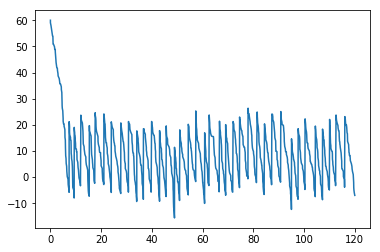

In [142]:
i = inventory(1, 27)
print(i[0])
plt.plot(i[1], i[2])

In [102]:
runs = 20
s_lo = 0
s_hi = 10
d_lo = 14
d_hi = 40
sweep = np.empty((s_hi - s_lo, d_hi - d_lo), float)
for i in range(s_lo,s_hi):
    print(i)
    for j in range(d_lo, d_hi):
        counter = 0
        for k in range(0, runs):
            counter += inventory(i, j)[0]
        sweep[i - s_lo, j - d_lo] = counter / runs

0
1
2
3
4
5
6
7
8
9


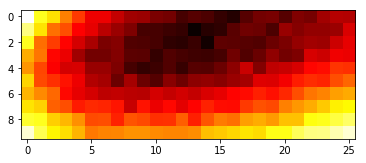

In [103]:
imgplot = plt.imshow(sweep)
imgplot.set_cmap('hot')
plt.show()

In [108]:
np.min(sweep)

46.734486933894559

In [109]:
np.where(sweep == np.min(sweep))

(array([1], dtype=int64), array([13], dtype=int64))

In [110]:
sweep[2,14]

46.847884369521573

In [144]:
def inventoryOld(s, d):
    inventory = [60]
    times = [0]
    end = 120
    
    stock = 60
    
    kept = 0
    backlog = 0
    
    order_count = 0
    order_amount = 0
    
    demand_rate = 0.1
    probs = [1/6, 3/6, 5/6, 1]
    
    previous = 0
    demand = np.random.exponential(demand_rate)
    supply =  end + 1
    coming = 0
    t = 0
    
    while t < end:
        
        if demand < supply:
            times.append(t)
            inventory.append(stock)
            if stock > 0:
                kept += (demand - t) * stock
            else:
                backlog -= (demand - t) * stock
                
            t = demand
            
            amount = np.random.random()
            for i in range(0,4):
                if probs[i] < amount:
                    amount = i + 1
                    break
                    
            stock -= amount 
            demand = t + np.random.exponential(demand_rate)
            
            times.append(t)
            inventory.append(stock)
            
            if stock < s and supply == end + 1:
                coming = d - stock
                order_amount += coming 
                order_count += 1
                supply = t + np.random.uniform(0.5, 1)
        else:
            
            if stock > 0:
                kept += (supply - t) * stock
            else:
                backlog -= (supply - t) * stock
                
            t = supply 
            stock += coming 
            
            times.append(t)
            inventory.append(stock)
            
            if stock < s:
                coming = d - stock
                order_amount += coming
                order_count += 1
                supply = t + np.random.uniform(0.5, 1)
            else:
                supply = end + 1
                
    if stock > 0:
        kept += (end - t) * stock
    else:
        backlog -= (end - t) * stock
                
    cost = kept * 1 + backlog * 5 + order_count * 32 + order_amount * 3
    return cost / end, times, inventory

62.497004132971185


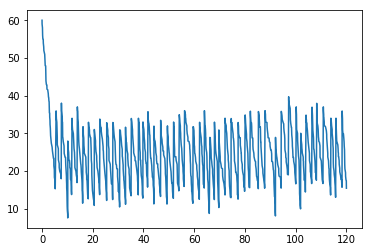

In [143]:
i = inventoryOld(20,40)
print(i[0])
plt.plot(i[1], i[2])